In [2]:
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
rooth_path = ("gdrive/My Drive/Colab Notebooks/")

In [4]:

import os
os.chdir('/content/drive/MyDrive')


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [7]:
df = pd.read_csv("Colab Notebooks/prefictive/bitcoin.csv")

In [8]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [10]:
df.shape

(4857377, 8)

In [26]:
df2 = df.sample(frac = 0.005)

In [27]:
df2.shape

(24287, 8)

In [28]:
df2.isna().sum()

Timestamp               0
Open                 6195
High                 6195
Low                  6195
Close                6195
Volume_(BTC)         6195
Volume_(Currency)    6195
Weighted_Price       6195
dtype: int64

In [ ]:
# removing na to draw boxplot 

In [29]:
df21 = df2.dropna()

In [30]:
df21.shape

(18092, 8)

In [31]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


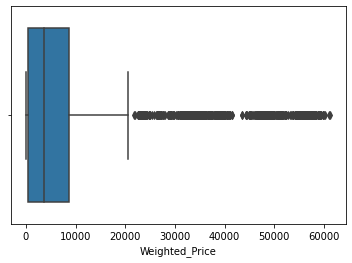

In [32]:
sns.boxplot(df21['Weighted_Price'])

In [37]:
from scipy import stats as st

In [39]:
df21['Weighted_Price'].mean()

5873.129431802994

as you can see here the data is right skewed which means mode is greater than mean so now we can imputing the missing values with the mean

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


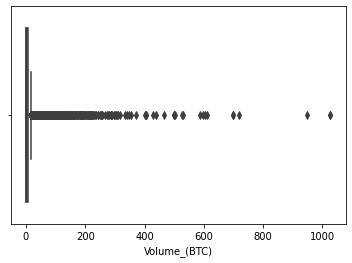

In [40]:
sns.boxplot(df21['Volume_(BTC)'])

In [ ]:
#so here the values greater than 1400 is an outlier so wean can remove that value

In [ ]:
df2 = df2.iloc[:,[5,7]]

In [ ]:
#removing the outlier row

In [47]:
df2 = df2.drop([1107300],axis=0)

In [45]:
t = df2['Volume_(BTC)']>1000

In [46]:
for i,j in enumerate(t):
  if(j==True):
    print(df2.loc[t])
    

         Volume_(BTC)  Weighted_Price
1107300   1026.452570      695.423482
1454216   1024.333786      299.924366
         Volume_(BTC)  Weighted_Price
1107300   1026.452570      695.423482
1454216   1024.333786      299.924366


In [52]:
df2.isna().sum()

Volume_(BTC)      6195
Weighted_Price    6195
dtype: int64

In [ ]:
#imputing the missing values with mean beacuause it is left skewed

In [53]:
df2['Weighted_Price'] = df2['Weighted_Price'].fillna(df2['Weighted_Price'].mean())

In [55]:
df2['Volume_(BTC)'] = df2['Volume_(BTC)'].fillna(df2['Volume_(BTC)'].mean())

In [58]:
df2.isnull().sum()

Volume_(BTC)      0
Weighted_Price    0
dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
train_1 = df2['Volume_(BTC)']
train_2 = df2['Weighted_Price']

In [64]:
x_train,x_test,Y_train,y_test = train_test_split(train_1,train_2)

In [65]:
x_train

4229622    3.196265
89516      9.409984
662184     1.575316
1699756    9.409984
4639563    0.462080
             ...   
815577     0.340245
2277367    9.409984
4255546    5.328110
103449     9.409984
4303796    7.288331
Name: Volume_(BTC), Length: 18214, dtype: float64

In [ ]:
df_train.head()

,Timestamp,Volume_(BTC),Volume_(Currency)
0,1325317920,0.455581,2.000000
478,1325346600,48.000000,210.720000
547,1325350740,37.862297,171.380338
548,1325350800,9.000000,41.220000
1224,1325391360,1.502000,6.879160


In [67]:

num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 1

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, Y_train, batch_size = batch_size, epochs = num_epochs)

3643/3643 [==============================] - 10s 2ms/step - loss: 92512624.0000


In [75]:


predicted_price = regressor.predict(x_test)


In [86]:
predicted_price

array([[13.885968 ],
       [13.899047 ],
       [13.8055105],
       ...,
       [13.17446  ],
       [12.730419 ],
       [13.899047 ]], dtype=float32)

In [79]:
#predicted_price
from sklearn.metrics import mean_absolute_error as mae

In [88]:
mae(y_test,predicted_price)/100

57.56025333337295